In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [65]:
#import data
mil = pd.read_csv('bucks.csv')
lak = pd.read_csv('lakers.csv')
rap = pd.read_csv('raps.csv')
nug = pd.read_csv('nuggets.csv')
cli = pd.read_csv('clips.csv')
bos = pd.read_csv('bos.csv')
hea = pd.read_csv('mia.csv')
roc = pd.read_csv('rockets.csv')
jaz = pd.read_csv('jazz.csv')
mav = pd.read_csv('mavs.csv')
data_array = [mil, lak, rap, nug, cli, bos, hea, roc, jaz, mav]

In [66]:
#change column titles
col_general = ['Rk', 'G', 'Date', 'Home?', 'Opp', 'W/L',
               'TmScore', 'OppScore', 'FG', 'FGA', 'FG%',
               '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
               'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'None',
               'FGo', 'FGAo', 'FG%o', '3Po', '3PAo', '3P%o', 'FTo', 
               'FTAo', 'FT%o', 'ORBo', 'TRBo', 'ASTo', 'STLo', 'BLKo', 
               'TOVo', 'PFo']

In [67]:
for i in data_array:
    #new column titles
    i.columns = col_general
    #drop unnecessary first row, which is a repeat of columns
    i.drop(axis=0, index=0, inplace=True)

In [68]:
#now the data looks like:
mil.head()

,Rk,G,Date,Home?,Opp,W/L,TmScore,OppScore,FG,FGA,...,FTo,FTAo,FT%o,ORBo,TRBo,ASTo,STLo,BLKo,TOVo,PFo
1,1,1,2019-10-24,@,HOU,W,117,111,46,99,...,29,39,.744,10,57,25,6,6,14,25
2,2,2,2019-10-26,NaN,MIA,L,126,131,41,94,...,23,36,.639,8,54,33,7,3,16,30
3,3,3,2019-10-28,NaN,CLE,W,129,112,48,92,...,10,12,.833,10,48,19,2,3,11,22
4,4,4,2019-10-30,@,BOS,L,105,116,38,82,...,17,21,.810,5,45,25,4,4,9,20
5,5,5,2019-11-01,@,ORL,W,123,91,47,93,...,11,17,.647,10,40,21,8,3,16,16


In [69]:
names_array = ['Mil', 'Lak', 'Tor', 'Den', 'Lac', 'Bos', 'Mia', 'Hou', 'Uta', 'Dal']
losses_array = [sum(i['W/L'] == 'L') for i in data_array]

In [70]:
losses_array

[7, 11, 14, 16, 15, 15, 16, 18, 18, 20]

In [71]:
# bucks lost less games than the others, but are they worse losses or not? 
# first metric is score difference, how much did they lose by?
def num(s):
    try:
        return int(s)
    except ValueError:
        return float(s)

def loss_difference(team):
    losses = team[team['W/L'] == 'L']
    losses['OppScore'] = losses['OppScore'].apply(num)
    losses['TmScore'] = losses['TmScore'].apply(num)
    score_difference = losses['OppScore'] - losses['TmScore']
    return np.mean(score_difference)

difference_array = [loss_difference(i) for i in data_array]
difference_array

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[9.857142857142858,
 11.818181818181818,
 8.142857142857142,
 9.5,
 11.333333333333334,
 8.133333333333333,
 11.6875,
 10.166666666666666,
 9.666666666666666,
 7.75]

In [72]:
team_data = list(zip(names_array, losses_array, difference_array))
team_data

[('Mil', 7, 9.857142857142858),
 ('Lak', 11, 11.818181818181818),
 ('Tor', 14, 8.142857142857142),
 ('Den', 16, 9.5),
 ('Lac', 15, 11.333333333333334),
 ('Bos', 15, 8.133333333333333),
 ('Mia', 16, 11.6875),
 ('Hou', 18, 10.166666666666666),
 ('Uta', 18, 9.666666666666666),
 ('Dal', 20, 7.75)]

In [73]:
visualize = pd.DataFrame(team_data, columns=['Team Name', 'Number of Losses', 'Score Difference'])
visualize

,Team Name,Number of Losses,Score Difference
0,Mil,7,9.857143
1,Lak,11,11.818182
2,Tor,14,8.142857
3,Den,16,9.500000
4,Lac,15,11.333333
5,Bos,15,8.133333
6,Mia,16,11.687500
7,Hou,18,10.166667
8,Uta,18,9.666667
9,Dal,20,7.750000


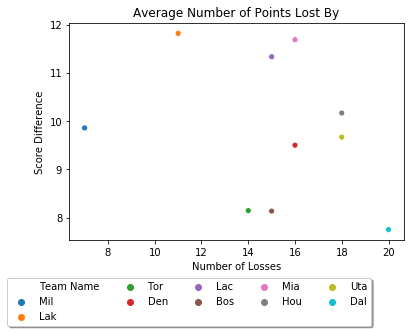

In [83]:
ax = sns.scatterplot(x = 'Number of Losses', y = 'Score Difference', hue='Team Name', data=visualize);
ax.legend(loc='upper left', bbox_to_anchor=(-0.2, -0.15),fancybox=True, shadow=True, ncol=5);
ax.set_title('Average Number of Points Lost By');
ax.figure.savefig('losses.png')